# Deterministic SIR

In [4]:
import matplotlib.pyplot as plt

In [35]:
def det_sir(S0, I0, R0, beta, gamma, n_days):
    n_population = S0 + I0 + R0
    S = [S0] * n_days
    I = [I0] * n_days
    R = [R0] * n_days
    for i in range(n_days-1):
        S[i+1] = S[i] - beta * S[i] * I[i] / n_population
        I[i+1] = I[i] + beta * S[i] * I[i] / n_population - gamma * I[i]
        R[i+1] = R[i] + gamma * I[i]
    return S, I, R

S, I, R = det_sir(S0=999, I0=1, R0=0, beta=0.3, gamma=0.05, n_days=100)

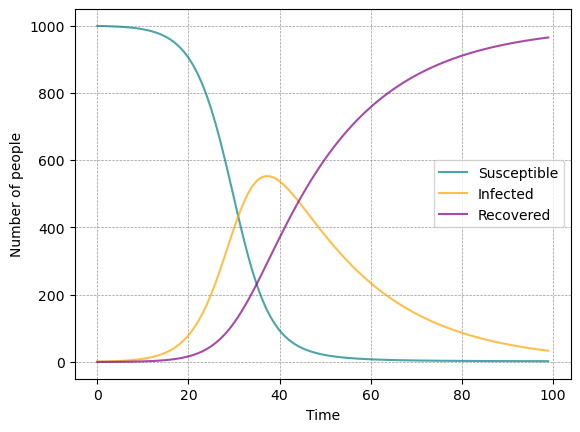

In [36]:
fig, ax = plt.subplots()
ax.plot(S, color='teal', alpha=0.7, label='Susceptible')
ax.plot(I, color='orange', alpha =0.7, label='Infected')
ax.plot(R, color='purple', alpha=0.7, label='Recovered')
ax.set_xlabel('Time')
ax.set_ylabel('Number of people')
ax.grid(color='#999999', linestyle='--', linewidth=0.5)
ax.legend()

In [66]:
import numpy as np
betas = np.arange(0, 0.5, 0.005)
max_size_beta = []
for b in betas:
    S, I, R = det_sir(S0=999, I0=1, R0=0, beta=b, gamma=0.05, n_days=100)
    max_size_beta.append(max(I))

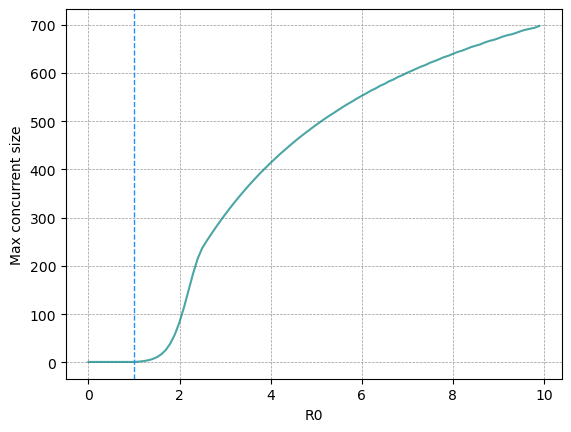

In [68]:
fig, ax = plt.subplots()
ax.plot([b/0.05 for b in betas], max_size_beta, color='teal', alpha=0.7)
ax.axvline(x=1, color='dodgerblue', linestyle='--', linewidth=1)
ax.set_ylabel('Max concurrent size')
ax.set_xlabel('R0')
ax.grid(color='#999999', linestyle='--', linewidth=0.5)


In [71]:
import random
random.uniform(0,1)

0.8618460172452026

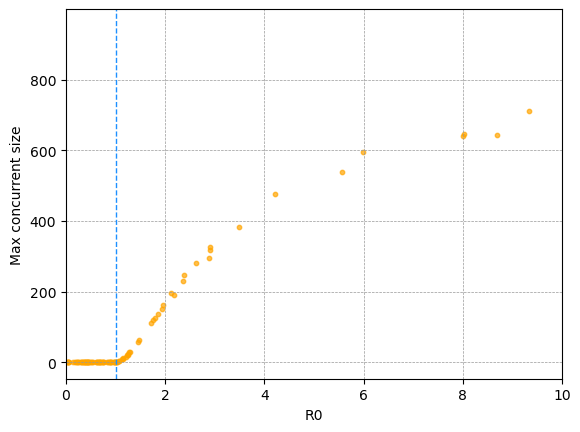

In [79]:
fig, ax = plt.subplots()
ax.axvline(x=1, color='dodgerblue', linestyle='--', linewidth=1)
ax.set_ylabel('Max concurrent size')
ax.set_xlabel('R0')
ax.grid(color='#999999', linestyle='--', linewidth=0.5)
ax.set_xlim(0, 10)
for i in range(100):
    beta = random.uniform(0, 1)
    gamma = random.uniform(0, 1)
    S, I, R = det_sir(S0=999, I0=1, R0=0, beta=beta, gamma=gamma, n_days=100)
    max_size = max(I)
    R0 = beta / gamma
    ax.scatter(R0, max_size, color='orange', alpha=0.7, s=10)